## Exploratory and Predictive Analysis of Heart Data

### 1. Definitions


age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholesterol in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

### 2. Setup

##### Import Packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### Import Data

In [43]:
data = pd.read_csv('heart.csv')

In [44]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

##### Uniqueness of Data

In [4]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict, index=["unique count"]).transpose()

unique count
age                 41
sex                  2
cp                   4
trtbps              49
chol               152
fbs                  2
restecg              3
thalachh            91
exng                 2
oldpeak             40
slp                  3
caa                  5
thall                4
output               2

##### Staistic of continuous attributes

In [5]:
con_attr = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
disc_attr = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

data[con_attr].describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2

##### Check for missing values

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### 3. Exploratory Analysis

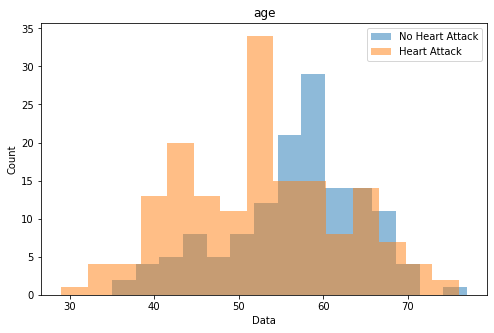

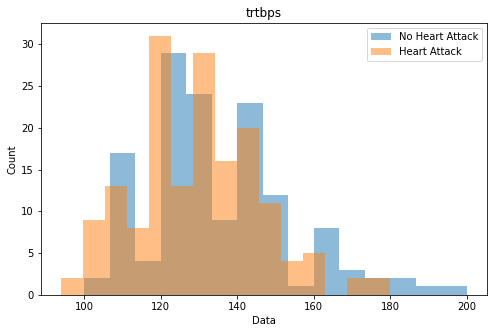

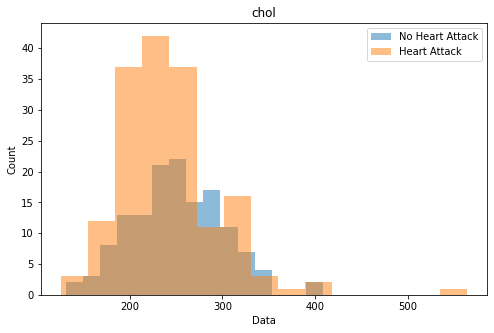

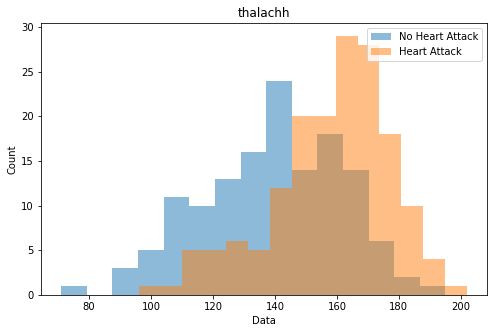

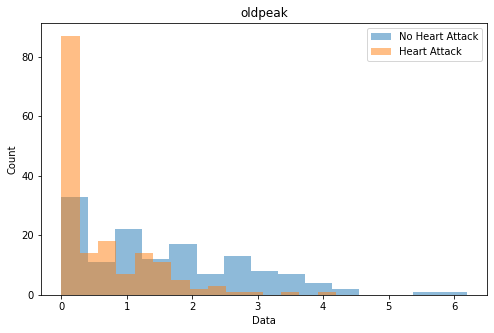

In [32]:
def plot_attribute_dist_by_output(data:pd.DataFrame, attribute:str) -> None:
    ax, fig = plt.subplots(figsize=(8,5))
    plt.title(attribute)
    plt.hist(data[data['output']==0][attribute], bins=15, alpha=0.5, label="No Heart Attack")
    plt.hist(data[data['output']==1][attribute], bins=15, alpha=0.5, label="Heart Attack")
    plt.xlabel("Data")
    plt.ylabel("Count")
    plt.legend(loc='upper right')
    plt.show()
    
for attr in con_attr:
    plot_attribute_dist_by_output(data, attr)